In [1]:
import pandas as pd
import os
import sys
from pathlib import Path
project_root = os.path.join('/home/shashank/research/hyper/HyperPPO')
os.chdir(project_root)
%pwd 

import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np


In [28]:
def plot_cdf(train_dir, max_num_seeds = 6):
    folders = os.listdir(train_dir)
    folders.sort(key=lambda x: int(x.split("_")[0]))
    ys = []
    xs = []
    k = 0
    for folder in folders:
        path_to_dataframe_folder = os.path.join(train_dir, folder,"dataframes")
        list_all_dataframes = os.listdir(path_to_dataframe_folder)
        # sort the list of dataframes by 3rd element after splitting by "_" and ignoring the ".csv" extension
        list_all_dataframes.sort(key=lambda x: int(x.split("_")[2].split(".")[0]))
        # get the path of the last dataframe
        path_to_last_dataframe = os.path.join(path_to_dataframe_folder, list_all_dataframes[-1])
        # print(path_to_last_dataframe)
        # read the last dataframe
        df = pd.read_csv(path_to_last_dataframe)

        rewards = df["reward"]
        # sort the rewards in descending order
        rewards = rewards.sort_values(ascending=False)
        max_reward = rewards.iloc[0]
        min_reward = rewards.iloc[-1]

        # create a cdf plot for the reward column
        x = np.linspace(-1000, max_reward, len(rewards))
        y = []
        for i in range(len(x)):
            x[i] = int(x[i])
            y.append(len(rewards) - (len(rewards[rewards <= x[i]])))
        ys.append(y)
        xs.append(x)
        k += 1
        if k == max_num_seeds:
            break

    # plot the cdf with mean and std deviation with color area
    num_agents = train_dir.split("_")[-1]
    # make legend as per the number of agents
    mean = np.mean(ys, axis=0)
    std = np.std(ys, axis=0)
    plt.plot(xs[0], mean, label=num_agents)
    plt.fill_between(xs[0], mean - std, mean + std, color='b', alpha=.1)


    # name the axes
    plt.xlabel("reward")
    plt.ylabel("number of policies")


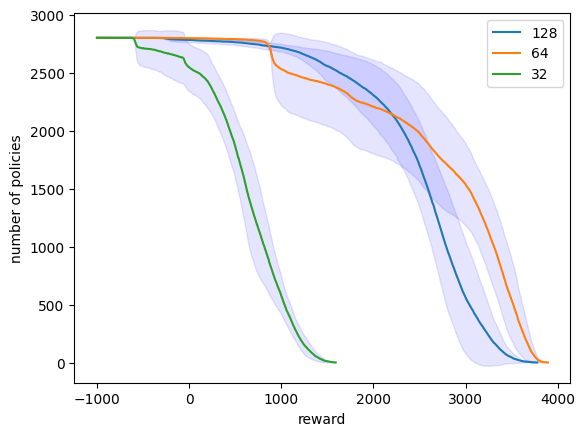

In [31]:
max_num_seeds = 4

# clear the plot
plt.clf()
train_dir = "train_dir/mujoco_128"
plot_cdf(train_dir, max_num_seeds)
train_dir = "train_dir/mujoco_64"
plot_cdf(train_dir, max_num_seeds)
train_dir = "train_dir/mujoco_32"
plot_cdf(train_dir, max_num_seeds)

plt.legend()

